<a href="https://colab.research.google.com/github/huoxudong125/Colab-Demo/blob/main/Copy_of_Python_3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

install package

In [ ]:
pip install numpy matplotlib mpl_toolkits

ERROR: Could not find a version that satisfies the requirement mpl_toolkits (from versions: none)
ERROR: No matching distribution found for mpl_toolkits


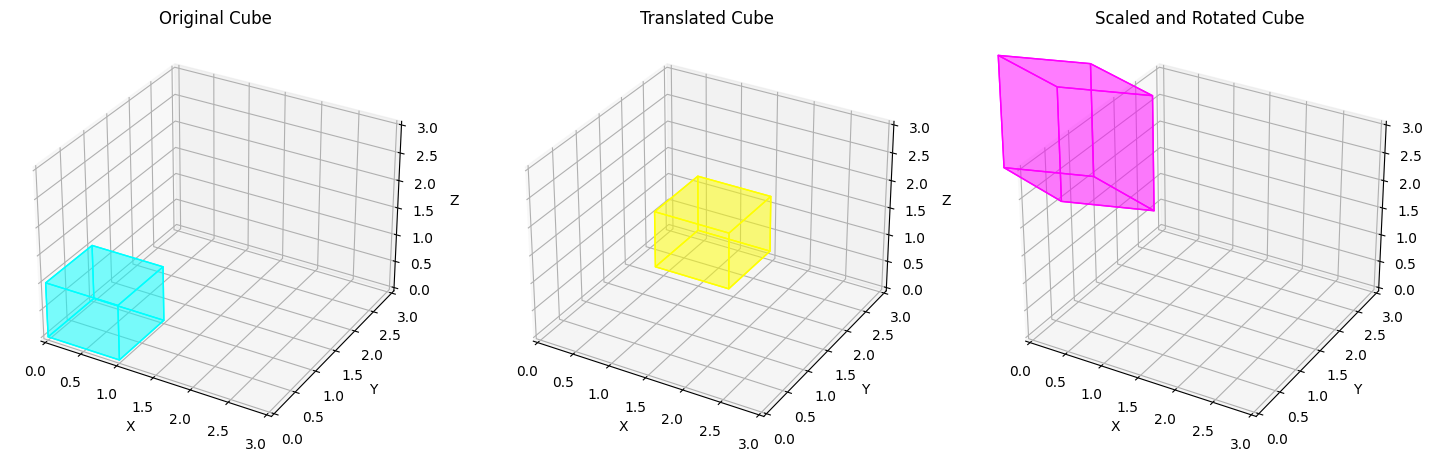

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 定义一个立方体的顶点
def create_cube():
    # 立方体的8个顶点坐标
    return np.array([
        [0, 0, 0],
        [1, 0, 0],
        [1, 1, 0],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 1],
        [1, 1, 1],
        [0, 1, 1]
    ])

# 定义绘制立方体的函数
def plot_cube(ax, vertices, color='cyan', alpha=0.3):
    # 定义立方体的六个面，每个面包含四个顶点
    faces = [
        [vertices[j] for j in [0, 1, 2, 3]],  # 底面
        [vertices[j] for j in [4, 5, 6, 7]],  # 顶面
        [vertices[j] for j in [0, 3, 7, 4]],  # 左面
        [vertices[j] for j in [1, 2, 6, 5]],  # 右面
        [vertices[j] for j in [0, 1, 5, 4]],  # 前面
        [vertices[j] for j in [2, 3, 7, 6]],  # 后面
    ]
    # 绘制每个面
    poly3d = Poly3DCollection(faces, color=color, linewidths=1, edgecolors='k', alpha=alpha)
    ax.add_collection3d(poly3d)

# 平移矩阵
def translation_matrix(tx, ty, tz):
    return np.array([
        [1, 0, 0, tx],
        [0, 1, 0, ty],
        [0, 0, 1, tz],
        [0, 0, 0, 1]
    ])

# 缩放矩阵
def scaling_matrix(sx, sy, sz):
    return np.array([
        [sx, 0, 0, 0],
        [0, sy, 0, 0],
        [0, 0, sz, 0],
        [0, 0, 0, 1]
    ])

# 绕Z轴旋转的矩阵
def rotation_matrix_z(theta):
    return np.array([
        [np.cos(theta), -np.sin(theta), 0, 0],
        [np.sin(theta), np.cos(theta), 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ])

# 对点集进行变换
def apply_transformation(vertices, transformation_matrix):
    # 增加齐次坐标列
    vertices_homogeneous = np.hstack([vertices, np.ones((vertices.shape[0], 1))])
    # 应用变换
    transformed_vertices = vertices_homogeneous @ transformation_matrix.T
    # 去除齐次坐标列
    return transformed_vertices[:, :3]

# 创建图形并设置3D视角
fig = plt.figure(figsize=(18, 6))
axes = [fig.add_subplot(1, 3, i+1, projection='3d') for i in range(3)]

# 创建一个初始立方体
vertices = create_cube()

# 1. 原始立方体
plot_cube(axes[0], vertices, color='cyan')
axes[0].set_title('Original Cube')

# 2. 平移后的立方体
T = translation_matrix(1, 1, 1)
translated_vertices = apply_transformation(vertices, T)
plot_cube(axes[1], translated_vertices, color='yellow')
axes[1].set_title('Translated Cube')

# 3. 缩放和旋转后的立方体
S = scaling_matrix(1.5, 0.5, 2)
Rz = rotation_matrix_z(np.pi / 4)
transformed_vertices = apply_transformation(translated_vertices, S @ Rz)
plot_cube(axes[2], transformed_vertices, color='magenta')
axes[2].set_title('Scaled and Rotated Cube')

# 设置各轴标签和视角
for ax in axes:
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim([0, 3])
    ax.set_ylim([0, 3])
    ax.set_zlim([0, 3])

plt.show()


## 增加视角


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from ipywidgets import interact
import ipywidgets as widgets

# 定义一个立方体的顶点
def create_cube():
    return np.array([
        [0, 0, 0],
        [1, 0, 0],
        [1, 1, 0],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 1],
        [1, 1, 1],
        [0, 1, 1]
    ])

# 定义绘制立方体的函数
def plot_cube(ax, vertices, color='cyan', alpha=0.3):
    faces = [
        [vertices[j] for j in [0, 1, 2, 3]],  # 底面
        [vertices[j] for j in [4, 5, 6, 7]],  # 顶面
        [vertices[j] for j in [0, 3, 7, 4]],  # 左面
        [vertices[j] for j in [1, 2, 6, 5]],  # 右面
        [vertices[j] for j in [0, 1, 5, 4]],  # 前面
        [vertices[j] for j in [2, 3, 7, 6]],  # 后面
    ]
    poly3d = Poly3DCollection(faces, color=color, linewidths=1, edgecolors='k', alpha=alpha)
    ax.add_collection3d(poly3d)

# 平移矩阵
def translation_matrix(tx, ty, tz):
    return np.array([
        [1, 0, 0, tx],
        [0, 1, 0, ty],
        [0, 0, 1, tz],
        [0, 0, 0, 1]
    ])

# 缩放矩阵
def scaling_matrix(sx, sy, sz):
    return np.array([
        [sx, 0, 0, 0],
        [0, sy, 0, 0],
        [0, 0, sz, 0],
        [0, 0, 0, 1]
    ])

# 绕Z轴旋转的矩阵
def rotation_matrix_z(theta):
    return np.array([
        [np.cos(theta), -np.sin(theta), 0, 0],
        [np.sin(theta), np.cos(theta), 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ])

# 对点集进行变换
def apply_transformation(vertices, transformation_matrix):
    vertices_homogeneous = np.hstack([vertices, np.ones((vertices.shape[0], 1))])
    transformed_vertices = vertices_homogeneous @ transformation_matrix.T
    return transformed_vertices[:, :3]

# 创建变换立方体并展示的函数
def plot_transformed_cube(elev=20, azim=30):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # 创建一个初始立方体
    vertices = create_cube()

    # 1. 原始立方体
    plot_cube(ax, vertices, color='gray')

    # 2. 平移后的立方体
    T = translation_matrix(1, 1, 1)
    translated_vertices = apply_transformation(vertices, T)
    plot_cube(ax, translated_vertices, color='green')

    # 3. 缩放和旋转后的立方体
    S = scaling_matrix(1.5, 0.5, 2)
    Rz = rotation_matrix_z(np.pi / 4)
    transformed_vertices = apply_transformation(translated_vertices, S @ Rz)
    plot_cube(ax, transformed_vertices, color='magenta')

    # 设置视角
    ax.view_init(elev=elev, azim=azim)

    # 设置各轴标签和视角范围
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim([0, 3])
    ax.set_ylim([0, 3])
    ax.set_zlim([0, 3])

    plt.show()

# 使用 interact 创建视角滑块
interact(plot_transformed_cube,
         elev=widgets.FloatSlider(value=20, min=0, max=90, step=1, description='Elevation'),
         azim=widgets.FloatSlider(value=30, min=0, max=360, step=1, description='Azimuth'))


interactive(children=(FloatSlider(value=20.0, description='Elevation', max=90.0, step=1.0), FloatSlider(value=…

<function __main__.plot_transformed_cube(elev=20, azim=30)>

## 在窗口上直接拖拽3D 图像

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

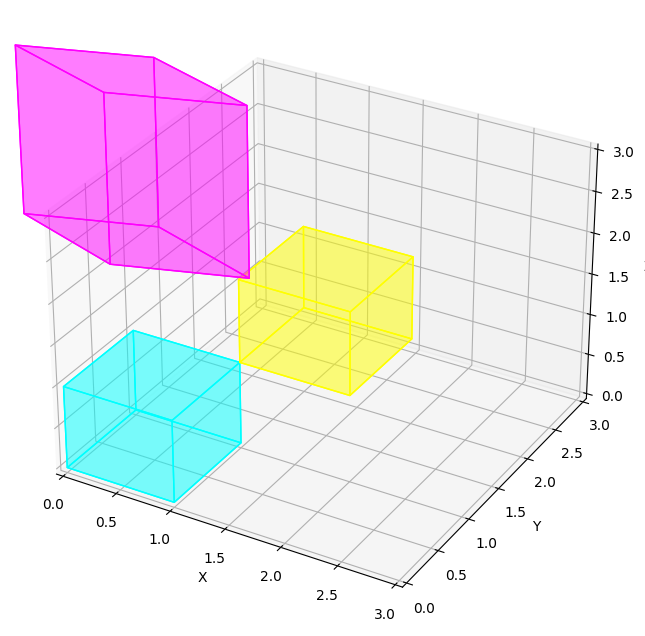

In [ ]:
#%matplotlib notebook
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 定义一个立方体的顶点
def create_cube():
    return np.array([
        [0, 0, 0],
        [1, 0, 0],
        [1, 1, 0],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 1],
        [1, 1, 1],
        [0, 1, 1]
    ])

# 定义绘制立方体的函数
def plot_cube(ax, vertices, color='cyan', alpha=0.3):
    faces = [
        [vertices[j] for j in [0, 1, 2, 3]],  # 底面
        [vertices[j] for j in [4, 5, 6, 7]],  # 顶面
        [vertices[j] for j in [0, 3, 7, 4]],  # 左面
        [vertices[j] for j in [1, 2, 6, 5]],  # 右面
        [vertices[j] for j in [0, 1, 5, 4]],  # 前面
        [vertices[j] for j in [2, 3, 7, 6]],  # 后面
    ]
    poly3d = Poly3DCollection(faces, color=color, linewidths=1, edgecolors='k', alpha=alpha)
    ax.add_collection3d(poly3d)

# 平移矩阵
def translation_matrix(tx, ty, tz):
    return np.array([
        [1, 0, 0, tx],
        [0, 1, 0, ty],
        [0, 0, 1, tz],
        [0, 0, 0, 1]
    ])

# 缩放矩阵
def scaling_matrix(sx, sy, sz):
    return np.array([
        [sx, 0, 0, 0],
        [0, sy, 0, 0],
        [0, 0, sz, 0],
        [0, 0, 0, 1]
    ])

# 绕Z轴旋转的矩阵
def rotation_matrix_z(theta):
    return np.array([
        [np.cos(theta), -np.sin(theta), 0, 0],
        [np.sin(theta), np.cos(theta), 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ])

# 对点集进行变换
def apply_transformation(vertices, transformation_matrix):
    vertices_homogeneous = np.hstack([vertices, np.ones((vertices.shape[0], 1))])
    transformed_vertices = vertices_homogeneous @ transformation_matrix.T
    return transformed_vertices[:, :3]

# 创建图形并设置3D视角
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 创建一个初始立方体
vertices = create_cube()

# 1. 原始立方体
plot_cube(ax, vertices, color='cyan')

# 2. 平移后的立方体
T = translation_matrix(1, 1, 1)
translated_vertices = apply_transformation(vertices, T)
plot_cube(ax, translated_vertices, color='yellow')

# 3. 缩放和旋转后的立方体
S = scaling_matrix(1.5, 0.5, 2)
Rz = rotation_matrix_z(np.pi / 4)
transformed_vertices = apply_transformation(translated_vertices, S @ Rz)
plot_cube(ax, transformed_vertices, color='magenta')

# 设置各轴标签和视角范围
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([0, 3])
ax.set_ylim([0, 3])
ax.set_zlim([0, 3])

plt.show()


在 Google Colab 中，`matplotlib` 的交互式 3D 绘图效果不直接支持。但可以使用 `plotly` 库来创建交互式 3D 图形。`plotly` 图表可以嵌入到 Colab 笔记本中，并支持旋转、平移、缩放等交互功能。

### 使用 `plotly` 实现 3D 交互图形
首先安装 `plotly`，然后使用它来绘制 3D 图像。以下是如何使用 `plotly` 实现交互式 3D 立方体变换：

### 代码说明
- 此代码使用 `plotly.graph_objects` 中的 `go.Mesh3d` 对象来绘制 3D 立方体。
- 我们绘制了原始立方体、平移后的立方体和缩放旋转后的立方体，并用不同的颜色区分。
- `fig.show()` 可以直接在 Colab 中展示交互式图像，支持旋转、平移、缩放等操作。

In [ ]:
# 安装 plotly
!pip install plotly

In [ ]:

import numpy as np
import plotly.graph_objects as go

# 创建立方体顶点
def create_cube():
    return np.array([
        [0, 0, 0],
        [1, 0, 0],
        [1, 1, 0],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 1],
        [1, 1, 1],
        [0, 1, 1]
    ])

# 定义平移矩阵
def translation_matrix(tx, ty, tz):
    return np.array([
        [1, 0, 0, tx],
        [0, 1, 0, ty],
        [0, 0, 1, tz],
        [0, 0, 0, 1]
    ])

# 定义缩放矩阵
def scaling_matrix(sx, sy, sz):
    return np.array([
        [sx, 0, 0, 0],
        [0, sy, 0, 0],
        [0, 0, sz, 0],
        [0, 0, 0, 1]
    ])

# 绕Z轴旋转的矩阵
def rotation_matrix_z(theta):
    return np.array([
        [np.cos(theta), -np.sin(theta), 0, 0],
        [np.sin(theta), np.cos(theta), 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ])

# 对点集进行变换
def apply_transformation(vertices, transformation_matrix):
    vertices_homogeneous = np.hstack([vertices, np.ones((vertices.shape[0], 1))])
    transformed_vertices = vertices_homogeneous @ transformation_matrix.T
    return transformed_vertices[:, :3]

# 初始立方体
vertices = create_cube()

# 1. 原始立方体
x1, y1, z1 = vertices.T

# 2. 平移后的立方体
T = translation_matrix(1, 1, 1)
translated_vertices = apply_transformation(vertices, T)
x2, y2, z2 = translated_vertices.T

# 3. 缩放和旋转后的立方体
S = scaling_matrix(1.5, 0.5, 2)
Rz = rotation_matrix_z(np.pi / 4)
transformed_vertices = apply_transformation(translated_vertices, S @ Rz)
x3, y3, z3 = transformed_vertices.T

# 立方体面的顶点索引
faces = [
    [0, 1, 2, 3],  # 底面
    [4, 5, 6, 7],  # 顶面
    [0, 3, 7, 4],  # 左面
    [1, 2, 6, 5],  # 右面
    [0, 1, 5, 4],  # 前面
    [2, 3, 7, 6]   # 后面
]

# 每个面的三角形索引
i, j, k = [], [], []
for face in faces:
    i += [face[0], face[0], face[2]]
    j += [face[1], face[2], face[3]]
    k += [face[3], face[1], face[1]]

# 创建 Plotly 图表对象
fig = go.Figure()

# 添加原始立方体
fig.add_trace(go.Mesh3d(
    x=x1, y=y1, z=z1,
    i=i, j=j, k=k,
    color='gray', opacity=0.5
))

# 添加平移后的立方体
fig.add_trace(go.Mesh3d(
    x=x2, y=y2, z=z2,
    i=i, j=j, k=k,
    color='yellow', opacity=0.5
))

# 添加缩放和旋转后的立方体
fig.add_trace(go.Mesh3d(
    x=x3, y=y3, z=z3,
    i=i, j=j, k=k,
    color='magenta', opacity=0.5
))

# 更新布局
fig.update_layout(
    scene=dict(
        xaxis=dict(range=[-1, 4]),
        yaxis=dict(range=[-1, 4]),
        zaxis=dict(range=[-1, 4])
    ),
    title="3D Cube Transformations"
)

# 显示图表
fig.show()


In [ ]:
# 安装 plotly
!pip install plotly

import numpy as np
import plotly.graph_objects as go

# 创建立方体顶点
def create_cube():
    return np.array([
        [0, 0, 0],
        [1, 0, 0],
        [1, 1, 0],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 1],
        [1, 1, 1],
        [0, 1, 1]
    ])

# 定义平移矩阵
def translation_matrix(tx, ty, tz):
    return np.array([
        [1, 0, 0, tx],
        [0, 1, 0, ty],
        [0, 0, 1, tz],
        [0, 0, 0, 1]
    ])

# 定义缩放矩阵
def scaling_matrix(sx, sy, sz):
    return np.array([
        [sx, 0, 0, 0],
        [0, sy, 0, 0],
        [0, 0, sz, 0],
        [0, 0, 0, 1]
    ])

# 绕Z轴旋转的矩阵
def rotation_matrix_z(theta):
    return np.array([
        [np.cos(theta), -np.sin(theta), 0, 0],
        [np.sin(theta), np.cos(theta), 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ])

# 对点集进行变换
def apply_transformation(vertices, transformation_matrix):
    vertices_homogeneous = np.hstack([vertices, np.ones((vertices.shape[0], 1))])
    transformed_vertices = vertices_homogeneous @ transformation_matrix.T
    return transformed_vertices[:, :3]

# 初始立方体
vertices = create_cube()

# 1. 原始立方体
x1, y1, z1 = vertices.T

# 2. 平移后的立方体
T = translation_matrix(1, 1, 1)
translated_vertices = apply_transformation(vertices, T)
x2, y2, z2 = translated_vertices.T

# 3. 缩放和旋转后的立方体
S = scaling_matrix(1.5, 0.5, 2)
Rz = rotation_matrix_z(np.pi / 4)
transformed_vertices = apply_transformation(translated_vertices, S @ Rz)
x3, y3, z3 = transformed_vertices.T

# 立方体面的顶点索引
faces = [
    [0, 1, 2, 3],  # 底面
    [4, 5, 6, 7],  # 顶面
    [0, 3, 7, 4],  # 左面
    [1, 2, 6, 5],  # 右面
    [0, 1, 5, 4],  # 前面
    [2, 3, 7, 6]   # 后面
]

# 每个面的三角形索引
i, j, k = [], [], []
for face in faces:
    i += [face[0], face[0], face[2]]
    j += [face[1], face[2], face[3]]
    k += [face[3], face[1], face[1]]

# 创建 Plotly 图表对象
fig = go.Figure()

# 添加原始立方体
fig.add_trace(go.Mesh3d(
    x=x1, y=y1, z=z1,
    i=i, j=j, k=k,
    color='blue', opacity=0.9,
    flatshading=True  # 平滑显示效果
))

# 添加平移后的立方体
fig.add_trace(go.Mesh3d(
    x=x2, y=y2, z=z2,
    i=i, j=j, k=k,
    color='green', opacity=0.9,
    flatshading=True  # 平滑显示效果
))

# 添加缩放和旋转后的立方体
fig.add_trace(go.Mesh3d(
    x=x3, y=y3, z=z3,
    i=i, j=j, k=k,
    color='red', opacity=0.9,
    flatshading=True  # 平滑显示效果
))

# 更新布局
fig.update_layout(
    scene=dict(
        xaxis=dict(range=[-1, 4]),
        yaxis=dict(range=[-1, 4]),
        zaxis=dict(range=[-1, 4])
    ),
    title="3D Cube Transformations"
)

# 显示图表
fig.show()
